In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [38]:
baseline = test_tI_errors + test_tII_errors
baseline

0.27361963190184047

Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

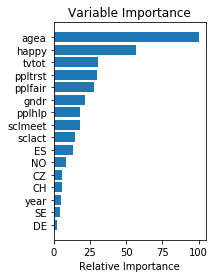

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [8]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.044189852700491
Percent Type II errors: 0.1692580469176214

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.18036809815950922


In [30]:
type_1_errors_train = [list() for i in range(3)]
type_2_errors_train = [list() for i in range(3)]
type_1_errors_test = [list() for i in range(3)]
type_2_errors_test = [list() for i in range(3)]
combined_errors_train = [list() for i in range(3)]
combined_errors_test = [list() for i in range(3)]
for depth in [1, 2, 3]:
    print(depth)
    for estimators in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
        print(estimators)
        params = {'n_estimators': estimators,
                  'max_depth': depth,
                  'loss': 'deviance'}
        clf = ensemble.GradientBoostingClassifier(**params)
        clf.fit(X_train, y_train)

        predict_train = clf.predict(X_train)
        predict_test = clf.predict(X_test)

        # Accuracy tables.
        table_train = pd.crosstab(y_train, predict_train, margins=True)
        table_test = pd.crosstab(y_test, predict_test, margins=True)

        train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
        train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
        test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
        test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
        
        type_1_errors_test[depth-1].append((estimators, test_tI_errors))
        type_2_errors_test[depth-1].append((estimators, test_tII_errors))
        type_1_errors_train[depth-1].append((estimators, train_tI_errors))
        type_2_errors_train[depth-1].append((estimators, train_tII_errors))
        combined_errors_test[depth-1].append((estimators, test_tI_errors + test_tII_errors))
        combined_errors_train[depth-1].append((estimators, train_tI_errors + train_tII_errors))

        print((
            'Training set accuracy:\n'
            'Percent Type I errors: {}\n'
            'Percent Type II errors: {}\n\n'
            'Test set accuracy:\n'
            'Percent Type I errors: {}\n'
            'Percent Type II errors: {}'
        ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

1
100
Training set accuracy:
Percent Type I errors: 0.03205128205128205
Percent Type II errors: 0.21808510638297873

Test set accuracy:
Percent Type I errors: 0.04539877300613497
Percent Type II errors: 0.21717791411042944
200
Training set accuracy:
Percent Type I errors: 0.03955264593562466
Percent Type II errors: 0.2078559738134206

Test set accuracy:
Percent Type I errors: 0.046625766871165646
Percent Type II errors: 0.21717791411042944
300
Training set accuracy:
Percent Type I errors: 0.04378068739770868
Percent Type II errors: 0.20226404800872885

Test set accuracy:
Percent Type I errors: 0.049079754601226995
Percent Type II errors: 0.2098159509202454
400
Training set accuracy:
Percent Type I errors: 0.04487179487179487
Percent Type II errors: 0.20021822149481724

Test set accuracy:
Percent Type I errors: 0.04785276073619632
Percent Type II errors: 0.20736196319018405
500
Training set accuracy:
Percent Type I errors: 0.046235679214402615
Percent Type II errors: 0.19953627932351337

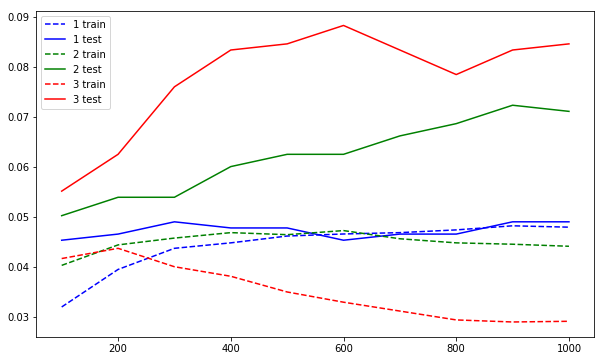

In [28]:
plt.figure(figsize=(10,6))
colors=['b', 'g', 'r']
for depth in range(1, 4):
    plt.plot(*zip(*type_1_errors_train[depth-1]), ls='--',
             label=str(depth)+" train",
             color=colors[depth-1])
    plt.plot(*zip(*type_1_errors_test[depth-1]), 
             label=str(depth)+" test",
             color=colors[depth-1])
plt.legend()

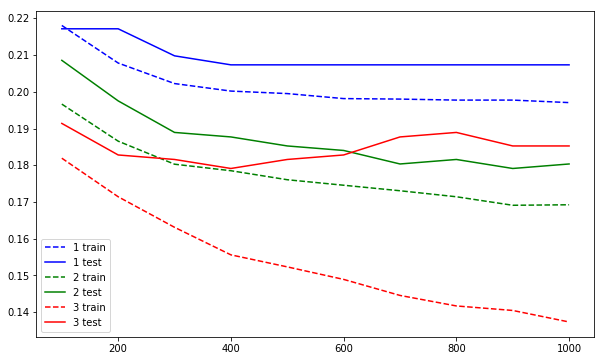

In [29]:
plt.figure(figsize=(10,6))
colors=['b', 'g', 'r']
for depth in range(1, 4):
    plt.plot(*zip(*type_2_errors_train[depth-1]), ls='--',
             label=str(depth)+" train",
             color=colors[depth-1])
    plt.plot(*zip(*type_2_errors_test[depth-1]), 
             label=str(depth)+" test",
             color=colors[depth-1])
plt.legend()

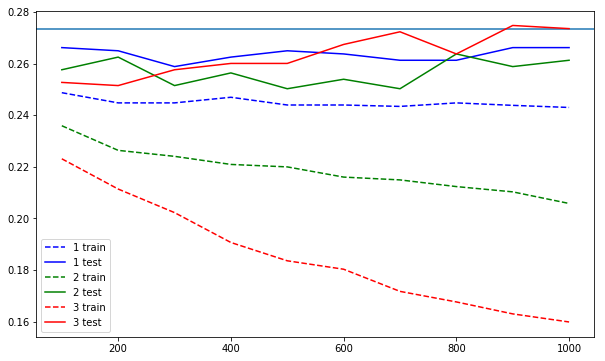

In [40]:
plt.figure(figsize=(10,6))
colors=['b', 'g', 'r']
plt.axhline(y=baseline)
for depth in range(1, 4):
    plt.plot(*zip(*combined_errors_train[depth-1]), ls='--',
             label=str(depth)+" train",
             color=colors[depth-1])
    plt.plot(*zip(*combined_errors_test[depth-1]), 
             label=str(depth)+" test",
             color=colors[depth-1])
plt.legend()

In [41]:
type_1_errors_train = [list() for i in range(3)]
type_2_errors_train = [list() for i in range(3)]
type_1_errors_test = [list() for i in range(3)]
type_2_errors_test = [list() for i in range(3)]
combined_errors_train = [list() for i in range(3)]
combined_errors_test = [list() for i in range(3)]
for depth in [2]:
    print(depth)
    for estimators in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
        print(estimators)
        params = {'n_estimators': estimators,
                  'max_depth': depth,
                  'subsample': .5,
                  'loss': 'deviance'}
        clf = ensemble.GradientBoostingClassifier(**params)
        clf.fit(X_train, y_train)

        predict_train = clf.predict(X_train)
        predict_test = clf.predict(X_test)

        # Accuracy tables.
        table_train = pd.crosstab(y_train, predict_train, margins=True)
        table_test = pd.crosstab(y_test, predict_test, margins=True)

        train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
        train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
        test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
        test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

        type_1_errors_test[depth-1].append((estimators, test_tI_errors))
        type_2_errors_test[depth-1].append((estimators, test_tII_errors))
        type_1_errors_train[depth-1].append((estimators, train_tI_errors))
        type_2_errors_train[depth-1].append((estimators, train_tII_errors))
        combined_errors_test[depth-1].append((estimators, test_tI_errors + test_tII_errors))
        combined_errors_train[depth-1].append((estimators, train_tI_errors + train_tII_errors))

        print((
            'Training set accuracy:\n'
            'Percent Type I errors: {}\n'
            'Percent Type II errors: {}\n\n'
            'Test set accuracy:\n'
            'Percent Type I errors: {}\n'
            'Percent Type II errors: {}'
        ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

2
100
Training set accuracy:
Percent Type I errors: 0.046644844517184945
Percent Type II errors: 0.18930714675395527

Test set accuracy:
Percent Type I errors: 0.05030674846625767
Percent Type II errors: 0.2
200
Training set accuracy:
Percent Type I errors: 0.04896344789961811
Percent Type II errors: 0.1788052373158756

Test set accuracy:
Percent Type I errors: 0.06625766871165645
Percent Type II errors: 0.18527607361963191
300
Training set accuracy:
Percent Type I errors: 0.047599563557010366
Percent Type II errors: 0.17716857610474632

Test set accuracy:
Percent Type I errors: 0.05889570552147239
Percent Type II errors: 0.19141104294478528
400
Training set accuracy:
Percent Type I errors: 0.04705400981996727
Percent Type II errors: 0.17389525368248773

Test set accuracy:
Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.18159509202453988
500
Training set accuracy:
Percent Type I errors: 0.04609929078014184
Percent Type II errors: 0.17062193126022912

Test set accur

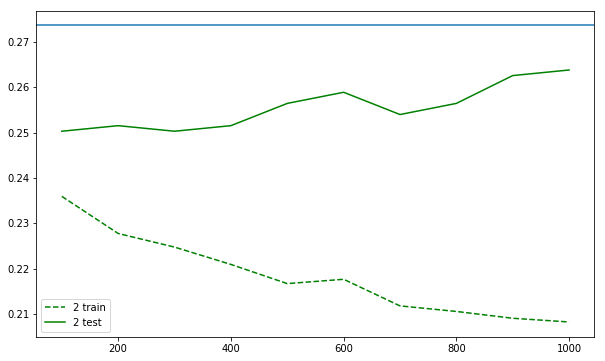

In [42]:
plt.figure(figsize=(10,6))
colors=['b', 'g', 'r']
plt.axhline(y=baseline)
for depth in range(2, 3):
    plt.plot(*zip(*combined_errors_train[depth-1]), ls='--',
             label=str(depth)+" train",
             color=colors[depth-1])
    plt.plot(*zip(*combined_errors_test[depth-1]), 
             label=str(depth)+" test",
             color=colors[depth-1])
plt.legend()